# Exercice 1

Importation des librairies utiles

In [2]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#To see our directory
import os
import random

from keras import applications
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Importation du fichier zip depuis mon drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/dataset/data.zip" 

In [5]:
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


 **Question 1-1**

Visualisation de quelques images


In [ ]:
def plotimg(imgpath):
 img= plt.imread(imgpath)
 imgplot = plt.imshow(img)
 
def plot_pic_grid(path, filenames, add_title=True):
 # set figsize
 fig = plt.figure()
 fig.set_size_inches((16,8))
 plotted = 0
 for c, r in enumerate(filenames):
   # get path to image file
   img_path_on_disk = path + r
   if len(img_path_on_disk) > 0:
     if plotted < 10:
       plotted+=1
       # plotting 10 images
       a = fig.add_subplot(2, 5, (plotted))
       img= plt.imread(img_path_on_disk)
       imgplot = a.imshow(img)
       if add_title:
         a.set_title(r) #print user_id, 'image plotted'
   else:
     # print user_id, 'no pic available'
     Pass

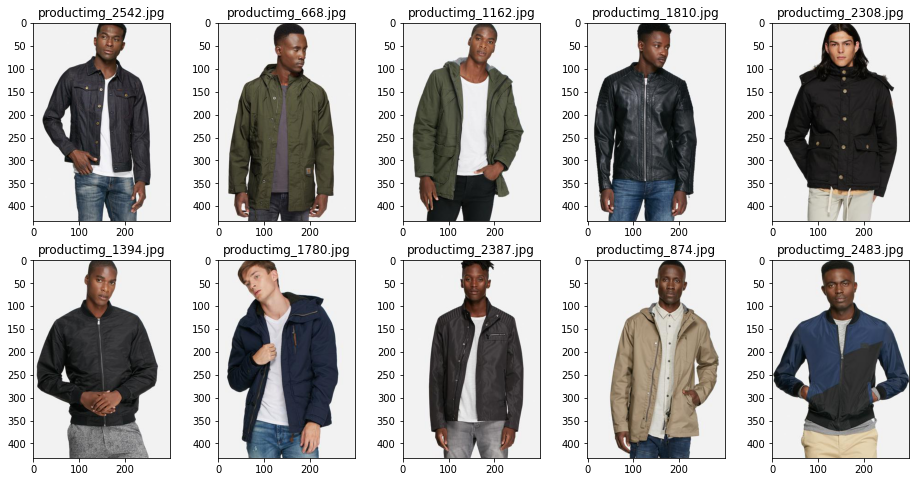

In [ ]:
path_data = '/content/data/'
plot_pic_grid(path_data +'train/jackets/', os.listdir(path_data +'train/jackets/')[:10])

In [6]:
#Split data
train_dir = './data/train'
validation_dir = './data/valid'
test_dir = './data/test'
image_size = 224

In [ ]:
#Construction du modele

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224,224,3)))#(2)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) # (3)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # (4)
model.add(layers.Dropout(0.5)) #Dropout for regularization # 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='softmax')) # (6) #Sigmoid
#sigmoid accuracy 0.2

#Summary du modèle. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

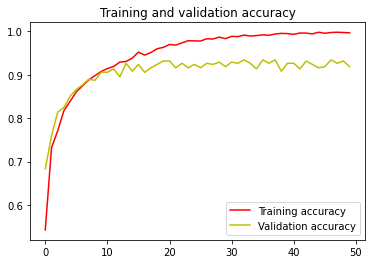

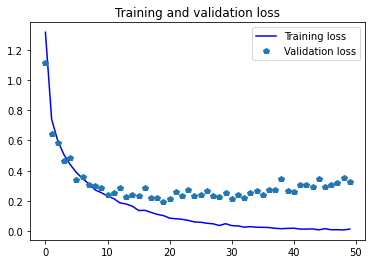

In [ ]:
#Pas d'augmentation des données
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

#Changement de la taille du batch
train_batchsize = 100
validation_batchsize = 10
test_batchsize = 1

#Data Generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size =(image_size, image_size),
    batch_size=train_batchsize,
    class_mode='categorical')

#Data Generator for validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size =(image_size, image_size),
    batch_size=validation_batchsize,
    class_mode='categorical', shuffle=False)

#Compile our model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#Train the model
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples/train_generator.batch_size,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples/validation_generator.batch_size,
                              verbose=1)

#Sauvegarder le modele
model.save('From-Scratch.f5')

#Plot l'accuracy et loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'p', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Ici, nous avons développé un CNN Keras pour classer les images de l'ensemble de données de l'exercice 1. Nous avons observé que notre modèle suradaptait les données - nous avons observé une précision d'entraînement de 99 à 100%, mais une précision de validation d'environ 91 à 92%.


**Question 1-2**

Data Augmentation

Found 3467 images belonging to 8 classes.
Found 382 images belonging to 8 classes.
Epoch 1/50
35/34 [==============================] - 50s 1s/step - loss: 0.7845 - acc: 0.7280 - val_loss: 0.7001 - val_acc: 0.7277
Epoch 2/50
35/34 [==============================] - 50s 1s/step - loss: 0.7005 - acc: 0.7494 - val_loss: 0.4700 - val_acc: 0.8246
Epoch 3/50
35/34 [==============================] - 50s 1s/step - loss: 0.6873 - acc: 0.7540 - val_loss: 0.4277 - val_acc: 0.8508
Epoch 4/50
35/34 [==============================] - 50s 1s/step - loss: 0.6300 - acc: 0.7695 - val_loss: 0.4382 - val_acc: 0.8586
Epoch 5/50
35/34 [==============================] - 50s 1s/step - loss: 0.6229 - acc: 0.7658 - val_loss: 0.4025 - val_acc: 0.8639
Epoch 6/50
35/34 [==============================] - 50s 1s/step - loss: 0.6160 - acc: 0.7727 - val_loss: 0.4353 - val_acc: 0.8534
Epoch 7/50
35/34 [==============================] - 50s 1s/step - loss: 0.5969 - acc: 0.7817 - val_loss: 0.3830 - val_acc: 0.8639
Epoch 8

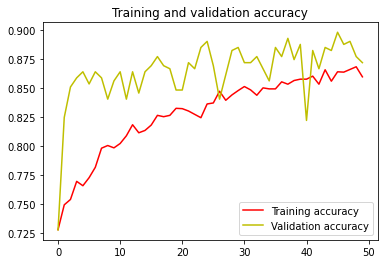

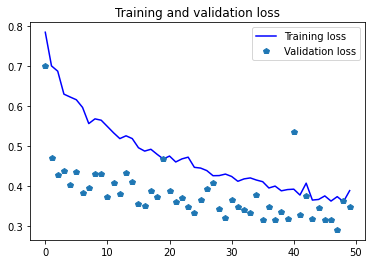

In [ ]:
#Augmentation des données
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255) #We do not augment validation data. we only perform rescale

#Changement de la taille du batch
train_batchsize = 100
validation_batchsize = 10
test_batchsize = 1

#Data Generator for training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size =(image_size, image_size),batch_size=train_batchsize)

#Data Generator for validation data
val_generator = val_datagen.flow_from_directory(
    validation_dir, target_size =(image_size, image_size),
    batch_size=validation_batchsize,
    class_mode='categorical', shuffle=False)


#Compile our model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples/train_generator.batch_size,
                              epochs=50,
                              validation_data=val_generator,
                              validation_steps=val_generator.samples/val_generator.batch_size,
                              verbose=1)


#Sauvegarder le modele
model.save('Exercice1-Augmentation.f5')

#Plot l'accuracy et loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'p', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Question 1-3**

In [ ]:
import keras
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

In [ ]:
# Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
# Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
# Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
# Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
import random, os
path = '/content/data/'
jacket = random.choice([x for x in os.listdir(path +'train/jackets/') if os.path.isfile(os.path.join(path +'train/jackets/', x))])
print(jacket)

productimg_1875.jpg


In [ ]:
#original = load_img('/content/data/tmp/'+train_imgs[0], target_size=(224, 224))
filename = './data/train/jackets/productimg_1875.jpg'

preprocessed
predictions
[[('n04370456', 'sweatshirt', 0.30795804), ('n03594734', 'jean', 0.1862797), ('n04599235', 'wool', 0.047283944), ('n03124170', 'cowboy_hat', 0.046372063), ('n02963159', 'cardigan', 0.044298533)]]


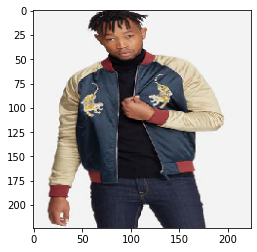

In [ ]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
numpy_image = img_to_array(original)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
plt.imshow(np.uint8(image_batch[0]))

# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
print("preprocessed")
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
print("predictions")
# print predictions
label = vgg16.decode_predictions(predictions)
print(label)

**Question 1-4**

In [9]:
from keras.applications import VGG16

#Architecture of the VGG16 convolutional base
conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(224, 224, 3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

The final feature map has shape (7, 7, 512). That's the feature on top of which we will stick a densely-connected classifier.

Méthode 1

In [ ]:
#Load images using the ImageDataGenerator class and generate batches of images and labels

datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 1

train_generator = datagen.flow_from_directory(
        '/content/data/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)


validation_generator = datagen.flow_from_directory(
        '/content/data/valid',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)


Found 3467 images belonging to 8 classes.
Found 382 images belonging to 8 classes.


In [ ]:
num_of_categories = 8
nTrain = 600
nVal = 150
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512)) 
    labels = np.zeros(shape=(sample_count, num_of_categories)) 
    generator = datagen.flow_from_directory(
                directory, 
                target_size=(32, 32), 
                batch_size=batch_size, 
                class_mode='categorical',
                shuffle=True)
    
    i=0
    print ("before for loop")
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, nTrain) 
train_features_vec = np.reshape(train_features, (nTrain, 7 * 7 * 512))

validation_features, validation_labels = extract_features(validation_dir, nVal) 
validation_features_vec = np.reshape(validation_features, (nVal, 7 * 7 * 512))

print("Train features: {}".format(train_features_vec.shape))
print("Validation features: {}".format(validation_features_vec.shape))

Found 3467 images belonging to 8 classes.
before for loop
Found 382 images belonging to 8 classes.
before for loop
Train features: (600, 25088)
Validation features: (150, 25088)


In [ ]:
# We will create a simple feedforward network with a softmax output layer having 8 classes.

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))


In [ ]:
# configure the model for training
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])


# use the train and validation feature vectors
history = model.fit(train_features_vec,
                    train_labels,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(validation_features_vec,validation_labels)
)


Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 1.8115 - acc: 0.5367 - val_loss: 1.2739 - val_acc: 0.6200
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 1.2760 - acc: 0.6517 - val_loss: 1.4687 - val_acc: 0.6133
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 1.0687 - acc: 0.7133 - val_loss: 1.7569 - val_acc: 0.6933
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 1.1320 - acc: 0.7183 - val_loss: 1.1721 - val_acc: 0.7133
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.9712 - acc: 0.7350 - val_loss: 1.2213 - val_acc: 0.7333
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.9834 - acc: 0.7617 - val_loss: 1.3140 - val_acc: 0.6933
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.9197 - acc: 0.7617 - val_loss: 1.3570 - val_acc: 0.7533
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.

We would like to visualize which images were wrongly classified.

No of errors = 1/150
Original label:accessories, Prediction :tees, confidence : 0.518


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


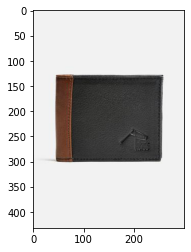

In [ ]:
#get the list of all validation file names
fnames = validation_generator.filenames

#get the list of the corresponding classes
ground_truth = validation_generator.classes

#get the dictionary of classes
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v, k) for k, v in label2index.items())
predictions = model.predict_classes(validation_features_vec)
prob = model.predict(validation_features_vec)
# to see which images were predicted wrongly
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors), nVal))
for i in range(len(errors)):
  pred_class = np.argmax(prob[errors[i]])
  pred_label = idx2label[pred_class]
  print('Original label:{}, Prediction :{}, confidence : {:.3f}'.format(fnames[errors[i]].split('/')[0],
                                                                        pred_label,
                                                                        prob[errors[i]][pred_class]))
  original = load_img('{}/{}'.format(validation_dir, fnames[errors[i]]))
  plt.imshow(original)
  plt.show()

Méthode 2

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Freeze the convolutional base
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labes
        class_mode='categorical')

Found 3467 images belonging to 8 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255) #We do not augment validation data. we only perform rescale

#Data Generator for validation data
val_generator = val_datagen.flow_from_directory(
    validation_dir, target_size =(224, 224),
    batch_size=20,
    class_mode='categorical', shuffle=False)

Found 382 images belonging to 8 classes.


In [ ]:
# configure the model for training
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples/validation_generator.batch_size,
                    verbose=1)

Epoch 1/20
174/173 [==============================] - 52s 298ms/step - loss: 1.1921e-07 - acc: 0.2137 - val_loss: 1.1921e-07 - val_acc: 0.2330
Epoch 2/20
174/173 [==============================] - 50s 288ms/step - loss: 1.1921e-07 - acc: 0.2217 - val_loss: 1.1921e-07 - val_acc: 0.2330
Epoch 3/20
174/173 [==============================] - 50s 289ms/step - loss: 1.1921e-07 - acc: 0.2189 - val_loss: 1.1921e-07 - val_acc: 0.2330
Epoch 4/20
174/173 [==============================] - 51s 293ms/step - loss: 1.1921e-07 - acc: 0.2180 - val_loss: 1.1921e-07 - val_acc: 0.2330
Epoch 5/20
174/173 [==============================] - 51s 293ms/step - loss: 1.1921e-07 - acc: 0.2152 - val_loss: 1.1921e-07 - val_acc: 0.2330
Epoch 6/20
174/173 [==============================] - 51s 293ms/step - loss: 1.1921e-07 - acc: 0.2187 - val_loss: 1.1921e-07 - val_acc: 0.2330
Epoch 7/20
174/173 [==============================] - 51s 293ms/step - loss: 1.1921e-07 - acc: 0.2150 - val_loss: 1.1921e-07 - val_acc: 0.2330

**Question 1-5**

In [10]:
conv_base = VGG16(weights='imagenet',
                include_top=False,
                input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in conv_base.layers[:-4]:
 layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
 print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f3d1f0d16a0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ce029def0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ce02c6160> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ce02c68d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ce02d0080> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ce02d0f60> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ce02d8278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ce02d8b38> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ce00319b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ce0031a58> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ce003b9b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

Create a new model

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(conv_base)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 8200      
Total params: 40,414,024
Trainable params: 32,778,760
Non-trainable params: 7,635,264
_________________________________________________________________


We can use ImageDataGenerator available in Keras to read images in batches directly from these folders and optionally perform data augmentation. We will use two different data generators for train and validation folders.

In [ ]:
image_size = 224

#Without data augmentation

# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


Found 3467 images belonging to 8 classes.
Found 382 images belonging to 8 classes.


In [ ]:
batch_size = 1
# Configure the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
 
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)


Epoch 1/20
35/34 [==============================] - 21s 593ms/step - loss: 0.7317 - acc: 0.7770 - val_loss: 0.2035 - val_acc: 0.9136
Epoch 2/20
35/34 [==============================] - 17s 496ms/step - loss: 0.1913 - acc: 0.9299 - val_loss: 0.1415 - val_acc: 0.9476
Epoch 3/20
35/34 [==============================] - 18s 503ms/step - loss: 0.1322 - acc: 0.9576 - val_loss: 0.1224 - val_acc: 0.9581
Epoch 4/20
35/34 [==============================] - 18s 502ms/step - loss: 0.0664 - acc: 0.9743 - val_loss: 0.1501 - val_acc: 0.9555
Epoch 5/20
35/34 [==============================] - 17s 494ms/step - loss: 0.0681 - acc: 0.9818 - val_loss: 0.1366 - val_acc: 0.9503
Epoch 6/20
35/34 [==============================] - 17s 495ms/step - loss: 0.0306 - acc: 0.9893 - val_loss: 0.1963 - val_acc: 0.9398
Epoch 7/20
35/34 [==============================] - 17s 496ms/step - loss: 0.0233 - acc: 0.9922 - val_loss: 0.2441 - val_acc: 0.9188
Epoch 8/20
35/34 [==============================] - 17s 499ms/step - 

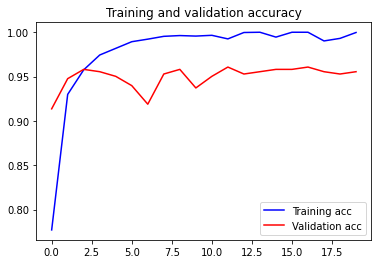

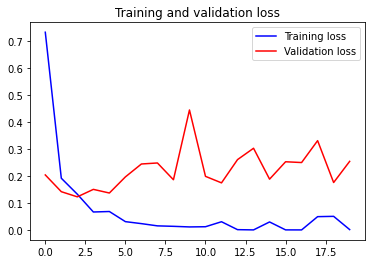

In [ ]:
# Utility function for plotting of the model results
def visualize_results(history):
  # Plot the accuracy and loss curves
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

# Run the function to illustrate accuracy and loss
visualize_results(history)


In [ ]:
# Utility function for obtaining of the errors
def obtain_errors(val_generator, predictions):
    # Get the filenames from the generator
    fnames = validation_generator.filenames

    # Get the ground truth from generator
    ground_truth = validation_generator.classes

    # Get the dictionary of classes
    label2index = validation_generator.class_indices

    # Obtain the list of the classes
    idx2label = list(label2index.keys())
    print("The list of classes: ", idx2label)

    # Get the class index
    predicted_classes = np.argmax(predictions, axis=1)

    errors = np.where(predicted_classes != ground_truth)[0]
    print("Number of errors = {}/{}".format(len(errors),validation_generator.samples))

    return idx2label, errors, fnames

# Utility function for visualization of the errors
def show_errors(idx2label, errors, predictions, fnames):
    # Show the errors
    for i in range(len(errors)):
        pred_class = np.argmax(predictions[errors[i]])
        pred_label = idx2label[pred_class]

        title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
            fnames[errors[i]].split('/')[0],
            pred_label,
            predictions[errors[i]][pred_class])

        original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
        plt.figure(figsize=[7,7])
        plt.axis('off')
        plt.title(title)
        plt.imshow(original)
        plt.show()



39/38 [==============================] - 2s 51ms/step
The list of classes:  ['accessories', 'jackets', 'jeans', 'knitwear', 'shirts', 'shoes', 'shorts', 'tees']
Number of errors = 17/382


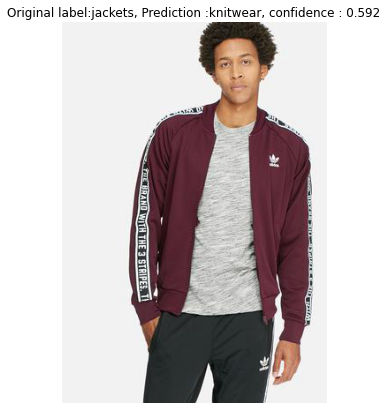

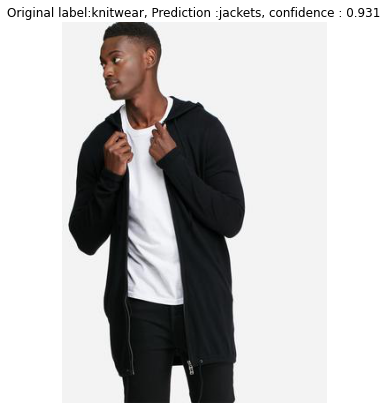

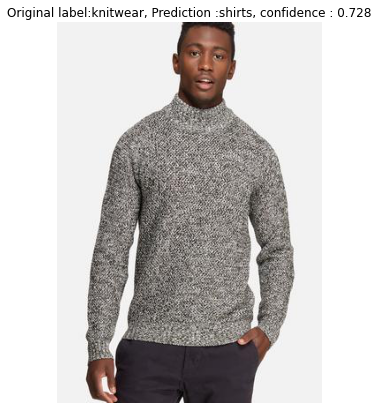

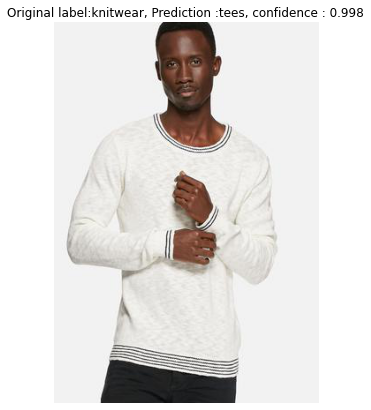

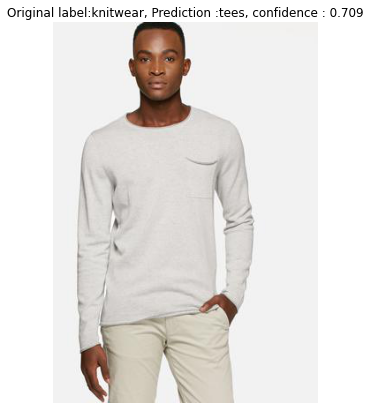

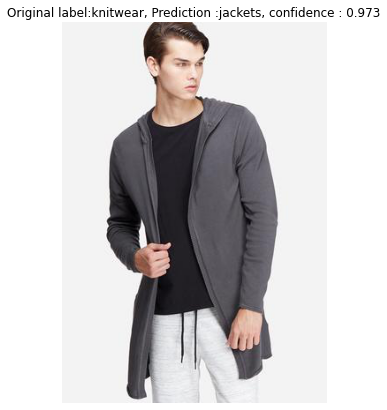

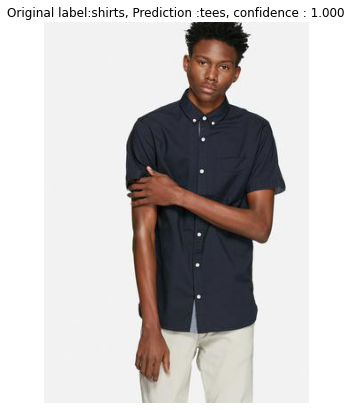

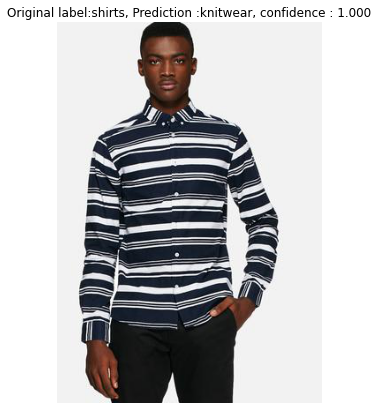

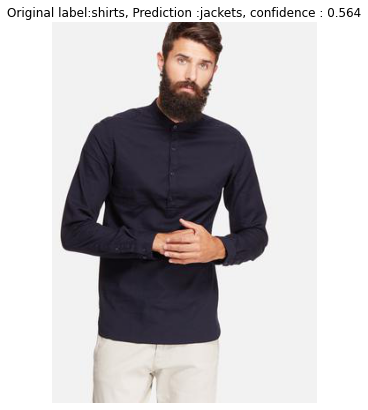

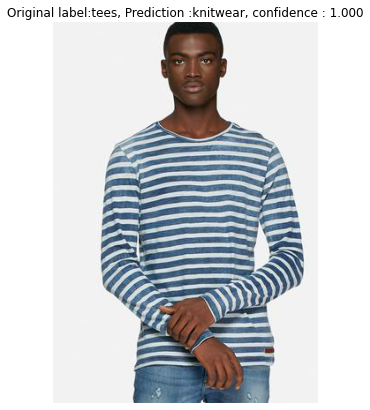

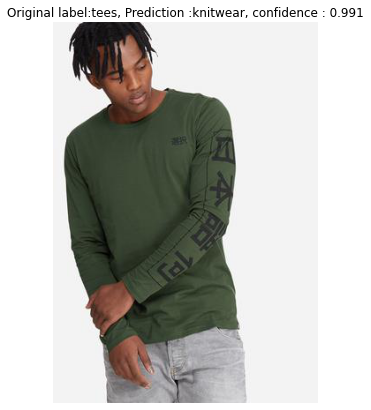

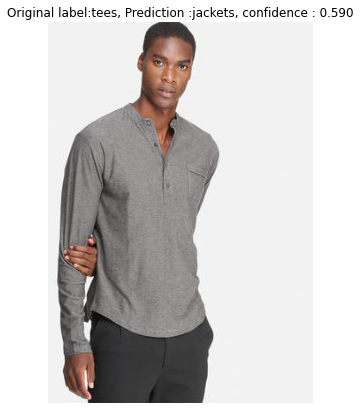

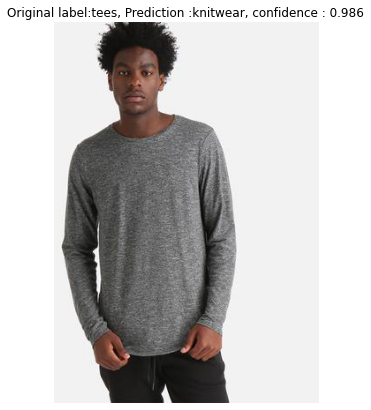

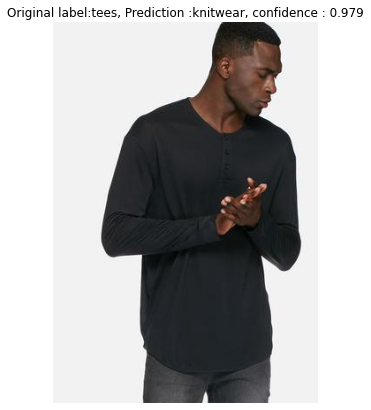

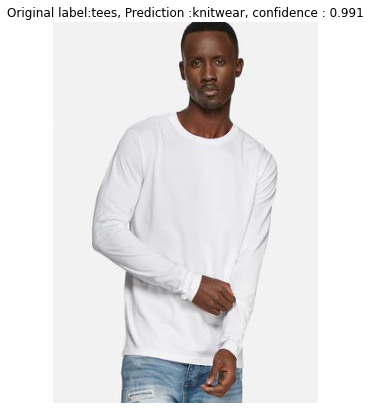

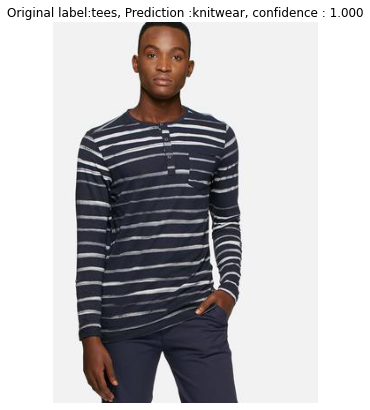

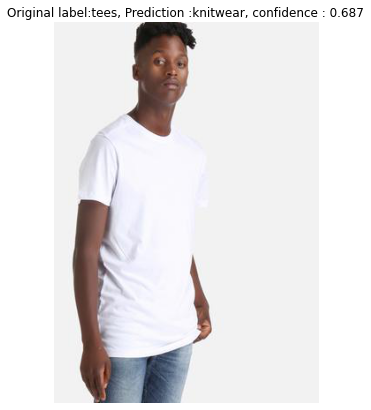

In [ ]:
# Get the predictions from the model using the generator
predictions = model.predict(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

# Run the function to get the list of classes and errors
idx2label, errors, fnames = obtain_errors(validation_generator, predictions)

# Run the function to illustrate the error cases
show_errors(idx2label, errors, predictions, fnames)


**Questin 1-6**

In [ ]:
print(len(train_features_vec))


600


The precedent model generated 600 features from the provided image. Each feature is a floating-point value between 0 and 1.

Now it’s time to extract features for the entire dataset. First, we get all the filenames with this handy function, which recursively looks for all the image files (defined by their extensions) under a directory:

In [11]:
from numpy.linalg import norm
import pickle
from keras.preprocessing import image

model = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(224, 224, 3))

def extract_features2(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features


In [12]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [13]:
# path to the datasets
root_dir = './data/train'
filenames = sorted(get_file_list(root_dir))

We now define a variable that will store all of the features, go through all filenames in the dataset, extract their features, and append them to the previously defined variable:

In [14]:
from tqdm import tqdm, tqdm_notebook
from keras.applications.vgg16 import preprocess_input

feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features2(filenames[i], model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


I write these features to a pickle file so that I can use them later

In [15]:
pickle.dump(feature_list, open('./data/features.pickle', 'wb'))
pickle.dump(filenames, open('data/filenames.pickle','wb'))

We begin by loading the precomputed features:

In [16]:
filenames = pickle.load(open('./data/filenames.pickle', 'rb'))
feature_list = pickle.load(open('./data/features.pickle', 'rb'))

We find nearest neighbors of the query features

In [17]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

Now we have both the indices and distances of the nearest five neighbors of the very first query feature (which represents the first image).

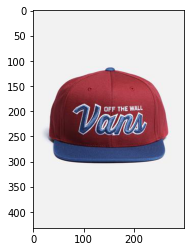

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline       
plt.imshow(mpimg.imread(filenames[0]))

In [19]:
for i in range(5):
    print(distances[0][i])

0.0
0.69318044
0.71764404
0.7774045
0.8139493


**Question 1-7**

In [20]:
from sklearn import decomposition

# Perform PCA over the features
num_feature_dimensions=100      # Set the number of features
pca = decomposition.PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:4000]
selected_filenames = filenames[:4000]

from sklearn.manifold import TSNE
tsne_results =TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3467 samples in 0.045s...
[t-SNE] Computed neighbors for 3467 samples in 1.258s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3467
[t-SNE] Computed conditional probabilities for sample 2000 / 3467
[t-SNE] Computed conditional probabilities for sample 3000 / 3467
[t-SNE] Computed conditional probabilities for sample 3467 / 3467
[t-SNE] Mean sigma: 0.191616
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.088547
[t-SNE] KL divergence after 1000 iterations: 1.300575


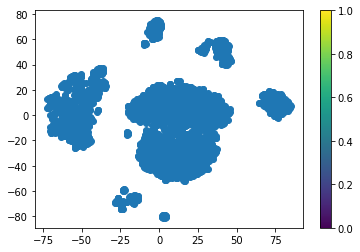

In [21]:
import seaborn as sns

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()